<a href="https://colab.research.google.com/github/AnaClarice382/machineLearning/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import statistics as stat 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from plotly.subplots import make_subplots
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [92]:
df_test = pd.read_csv('/content/test.csv',)
df_train = pd.read_csv('/content/train.csv')

# Análise exploratória EDA

In [93]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Inicialmente já conseguimos notar algumas coisas sobres nossos dados.

Para o atributo Age

*   Existem **alguns** dados ausentes
*   Maioria dos passageiros é jovem (75% dos passageiros tem até 38)

Para o atributo Cabin
*   Existem **MUITOS** dados ausentes.

Para o atributo Pclass
*   Pelo menos metade dos passageiros é da 3º classe


In [95]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Similar ao df de treino <br>
*   Age faltam alguns dados <br>
*   Cabin faltam muitos dados<br>
*   Passageiros em sua maioria jovens e de 3º classe

In [97]:
def create_new_column_boolean(df, condiction, columnName):
    df.loc[condiction, columnName] = 1
    df.loc[~condiction, columnName] = 0
    df[columnName] = df[columnName].astype(int)

### Atributo Sex (Sexo) e Pclass (Classe)

In [98]:
create_new_column_boolean(df_train, (df_train["Sex"] == 'female'), "is_female") #Criação da coluna is_female
create_new_column_boolean(df_test, (df_test["Sex"] == 'female'), "is_female") #Criação da coluna is_female

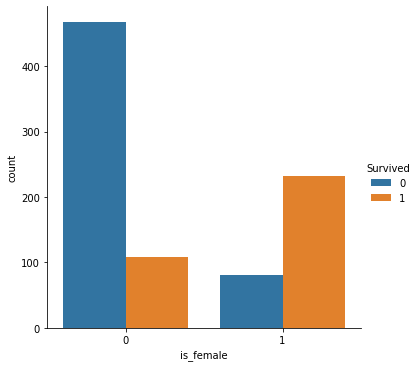

In [99]:
sns.catplot(x="is_female", kind="count", data=df_train, hue='Survived')

In [100]:
df_train[['Survived', 'is_female']].groupby('is_female').mean()

,Survived
is_female,
0,0.188908
1,0.742038


--> Mulheres sobrevivem muito mais que homens, o que faz total sentido, já que mulheres tiveram prioridade no salvamento. 

In [101]:
f = df_train.groupby('Sex').get_group('female')
m = df_train.groupby('Sex').get_group('male')

In [102]:
fig = px.box(m, x='Survived', y='Fare',
             points="all", color='Survived', title='Homens sobreviventes por valor de ticket (Fare)')
fig.show()

In [103]:
fig = px.box(f, x='Survived', y='Fare',
             points="all", color='Survived', title='Mulheres sobreviventes por valor de ticket (Fare)')
fig.show()

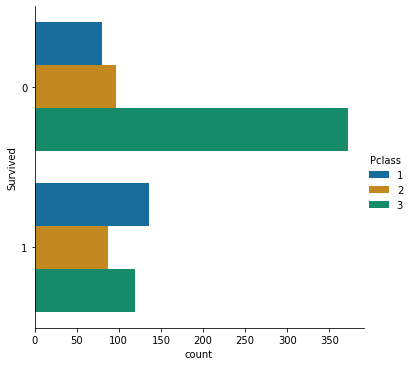

In [104]:
sns.catplot(y="Survived", hue="Pclass", kind="count",
            palette="colorblind",
            data=df_train)

### Atributo Cabin e Embarked

In [105]:
df_train['Cabin'] = df_train['Cabin'].fillna(0, inplace=False)
df_test['Cabin'] = df_test['Cabin'].fillna(0, inplace=False)

create_new_column_boolean(df_train, (df_train["Cabin"] != 0), "has_cabin")
create_new_column_boolean(df_test, (df_test["Cabin"] != 0), "has_cabin")

In [106]:
df_train[['has_cabin', 'Pclass']].groupby('Pclass').mean()

,has_cabin
Pclass,
1,0.814815
2,0.086957
3,0.024440


In [107]:
df_train[['has_cabin', 'Survived']].groupby('has_cabin').mean()

,Survived
has_cabin,
0,0.299854
1,0.666667


Sobrevive mais quem tem um número de cabine defido. Existem vários fatores que podem ter influenciado nessa estatísca, entre eles:<br>
--> número de pessoas dentro das cabines;<br>
--> longa distância entre as cabines de classes menores e o convés;<br>
--> proximidade entre as cabines de classes menores e o local de impacto

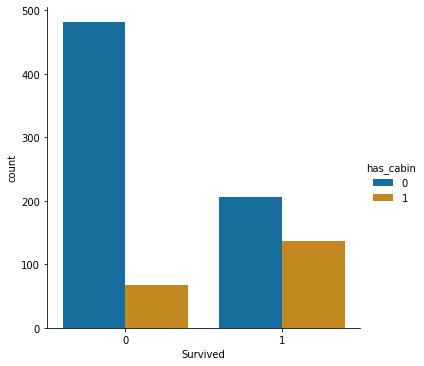

In [108]:
sns.catplot(x="Survived", hue="has_cabin", kind="count",
            palette="colorblind",
            data=df_train)

In [109]:
df_train[df_train['Embarked'].isna()]
### Verificando os passageiros com Embarked == NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,has_cabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


Através de pesquisas sobre os passageiros, descobrimos que estes dois sem o Embarked definido são de Southamptom.

In [110]:
df_train['Embarked'] = df_train['Embarked'].fillna('S', inplace=False)
embarked = df_train.groupby('Embarked')

In [111]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=embarked.get_group('S')['Survived'], name='S'))
fig.add_trace(go.Histogram(x=embarked.get_group('C')['Survived'], name='C'))
fig.add_trace(go.Histogram(x=embarked.get_group('Q')['Survived'], name='Q'))


# Overlay both histograms
fig.update_layout(barmode='overlay',title='Sobreviventes por local de embarque')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [112]:
df_train[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


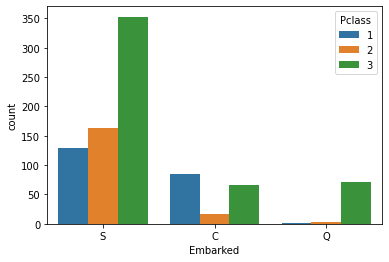

In [113]:
sns.countplot(data=df_train, x ='Embarked', hue='Pclass')

--> Embarcantes em 'C' sobrevivem mais que embarcantes em 'Q' e 'S'

O Titanic partiu em sua primeira e única viagem com 1 316 passageiros a bordo: 325 na primeira classe, 285 na segunda e 706 na terceira. 

Deles, 922 embarcaram em Southampton, 274 em Cherbourg-Octeville na França e 120 em Queenstown na Irlanda.

In [114]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Atributo Fare (Preço do ticket)

In [115]:
df_test['Fare'] = df_test['Fare'].fillna(df_test[df_test['Pclass']==3]['Fare'].mean(), inplace=False)

In [116]:
df_train[df_train['Fare']==512]
df_train = df_train.drop(258)#A pessoa de index 258 provavelmente foi um erro, então preferimos remover

In [117]:
fig = px.box(df_train, y='Fare')
fig.show()

Percebemos que a Fare possui muitos outliers. Veremos suas características.

In [118]:
df_train[df_train['Fare'] > 66.6]['Pclass'].value_counts()

1    101
3      7
2      5
Name: Pclass, dtype: int64

Notamos que os passageiros outliers tem um perfil bem definido, então não podemos simplesmente retirá-los.

Decidimos valorar quanto cada passageiro pagou individualmente pelo seu ticket de embarque, já que pessoas que dividiam a mesma cabine pagavam em conjunto o valor de Fare.

In [119]:
df_train['Ticket'].value_counts()

1601           7
CA. 2343       7
347082         7
3101295        6
CA 2144        6
              ..
PC 17482       1
220367         1
PC 17590       1
11753          1
S.W./PP 752    1
Name: Ticket, Length: 681, dtype: int64

In [120]:
#Formataçao da Fare ------------------------------------------------------------------------------

def format_fare(row, ticket_counts):
  return row['Fare']/ticket_counts[row['Ticket']]

ticket_counts = df_train['Ticket'].value_counts()
df_train['FarePerPassenger'] = df_train.apply(format_fare, args=(ticket_counts, ), axis=1)

ticket_counts = df_test['Ticket'].value_counts()
df_test['FarePerPassenger'] = df_test.apply(format_fare, args=(ticket_counts, ), axis=1)

Pensamos nisso como uma maneira de atenuar o impacto dos outliers presentes na Fare

In [121]:
fig = px.box(df_train, y='FarePerPassenger')
fig.show()

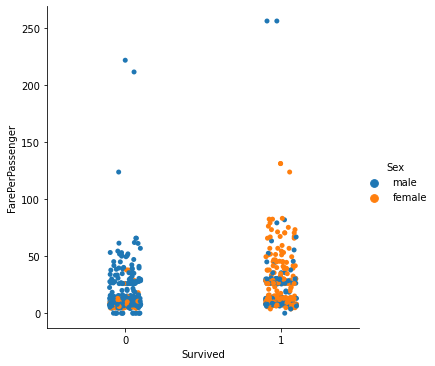

In [122]:
sns.catplot(x="Survived", y="FarePerPassenger", hue="Sex", data=df_train)

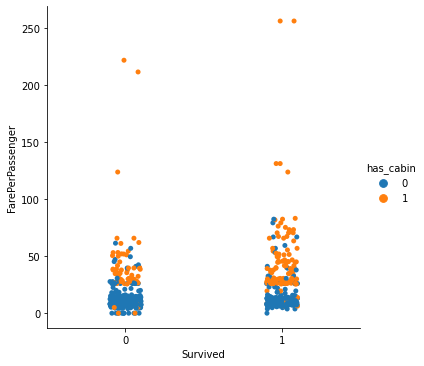

In [123]:
sns.catplot(x="Survived", y="FarePerPassenger", hue="has_cabin", data=df_train)

Para reduzir mais ainda os impactos dos outliers, iremos agrupar o valores da fare em 4 grupos defidos pelos quartis.

In [124]:
df_train['FareClass'] = pd.qcut(df_train['FarePerPassenger'], 4)
df_train[['Survived', 'FareClass']].groupby('FareClass').mean()

,Survived
FareClass,
"(-0.001, 7.756]",0.246637
"(7.756, 8.8]",0.256757
"(8.8, 23.0]",0.385650
"(23.0, 256.165]",0.644144


In [125]:
df_train.loc[df_train['FarePerPassenger'] <= 7.756, 'FarePerPassenger'] = 0
df_train.loc[(df_train['FarePerPassenger'] > 7.756) & (df_train['FarePerPassenger'] <= 8.8), 'FarePerPassenger'] = 1
df_train.loc[(df_train['FarePerPassenger'] > 8.8) & (df_train['FarePerPassenger'] <=  23.0), 'FarePerPassenger']   = 2
df_train.loc[ df_train['FarePerPassenger'] >  23.0, 'FarePerPassenger'] = 3
df_train['FarePerPassenger'] = df_train['FarePerPassenger'].astype(int)

In [126]:
df_test.loc[df_test['FarePerPassenger'] <= 7.756, 'FarePerPassenger'] = 0
df_test.loc[(df_test['FarePerPassenger'] > 7.756) & (df_test['FarePerPassenger'] <= 8.8), 'FarePerPassenger'] = 1
df_test.loc[(df_test['FarePerPassenger'] > 8.8) & (df_test['FarePerPassenger'] <= 23), 'FarePerPassenger']   = 2
df_test.loc[ df_test['FarePerPassenger'] >  23.0, 'FarePerPassenger'] = 3
df_test['FarePerPassenger'] = df_test['FarePerPassenger'].astype(int)

### Atributo Age (Idade) e Title (Novo atributo)

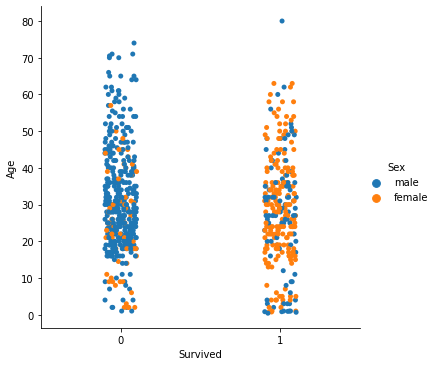

In [127]:
sns.catplot(x="Survived", y="Age", hue="Sex", data=df_train)

Podemos ver que:
*   Acima de ~60 não sobreviveram muitas pessoas
*   Quanto mais velho o homem maior a taxa de morte

In [128]:
def fillage(row, age):
  if np.isnan(row['Age']): 
    row['Age'] = age[row['Pclass'], row['Sex'], row['Title']]
  return row

In [129]:
def get_title(name):
  names = name.split(',')
  tokens = names[1].split(' ')
  return tokens[1]

In [130]:
def count_title(item, title_counts):
  if title_counts[item] < 8:
    return 'Rare'
  
  return item

O titulo ajuda a definir uma faixa etária para o passageiro, dessa forma extraimos o titulo do nome de cada passageiro para preencher a idade.

In [131]:
df_train['Title'] = df_train['Name'].apply(get_title)
title_counts = df_train['Title'].value_counts()

df_train['Title'] = df_train['Title'].apply(count_title, args=(title_counts, ))

df_test['Title'] = df_test['Name'].apply(get_title)
title_counts = df_test['Title'].value_counts()

df_test['Title'] = df_test['Title'].apply(count_title, args=(title_counts, ))


Percebemos que o titulo tem uma relação com sobrevivência. 
*   Mulheres e crianças **(Mrs, Miss e Master)** têm maiores taxas de sobrevivência
*   Homens adultos (Mr) têm menores taxas de sobrevivência

Classificamos como **Rare** todos os titulos que tinham menos que 8 passageiros

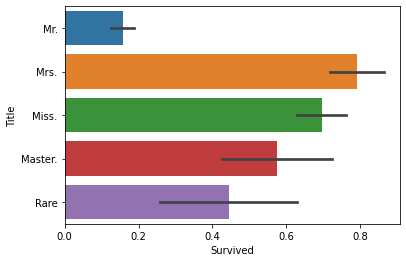

In [132]:
sns.barplot(data=df_train, x='Survived', y='Title')

In [133]:
nan_age = df_train[df_train['Age'].isna()]
age = df_train[['Pclass', 'Sex', 'Age', 'Title']].groupby(['Pclass', 'Sex', 'Title'])['Age'].median()

nan_age = nan_age.apply(fillage, args=(age, ), axis=1)

In [134]:
fig = make_subplots(rows=1, cols=2)
trace1 = go.Histogram(x=df_train['Age'], name='Dados gerais')
trace0 = go.Histogram(x=nan_age['Age'], name='Nossa modelagem')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

Para substituir as idades ausentes no dataset, pegamos a média das idades baseado nos atributos: Pclass, Title, Sex. 

Se compararmos a distribuição geral das idades com os dados que substituímos, notamos semelhança.

In [135]:
fig.show()

In [136]:
df_train = df_train.apply(fillage, args=(age, ), axis=1)

In [137]:
age = df_test[['Pclass', 'Sex', 'Age', 'Title']].groupby(['Pclass', 'Sex', 'Title'])['Age'].median()
df_test = df_test.apply(fillage, args=(age, ), axis=1)
df_test.fillna(df_train['Age'].median(), inplace=True)

### Atributos relacionados a membros da familia (SibSp e Parch)

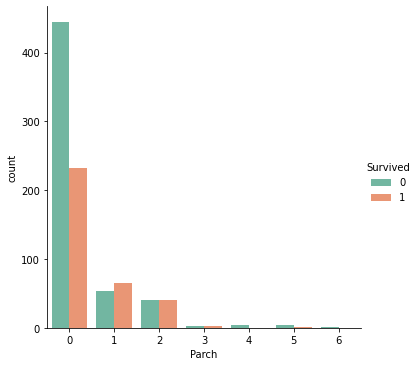

In [138]:
sns.catplot(x="Parch", kind='count', hue="Survived", data=df_train, palette='Set2')

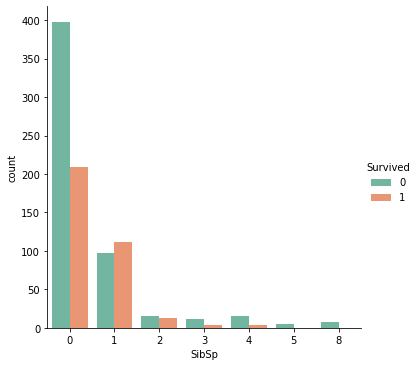

In [139]:
sns.catplot(x="SibSp", kind='count', hue="Survived", data=df_train, palette='Set2')

Como as taxas de sobrevivência de SipSp e Parch se comportam similarmente, decidimos juntá-las em uma única feature chamada Family.

Notamos que quanto maior o número de pessoas da mesma familia, menor a taxa de sobrevivência.

In [140]:
df_test['Family'] = df_test['SibSp'] + df_test['Parch']
df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_train[['Survived', 'Family']].groupby('Family').mean()

,Survived
Family,
0,0.302239
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


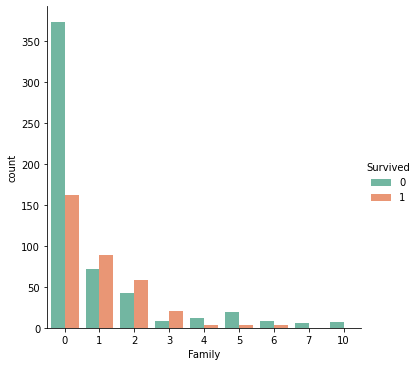

In [141]:
sns.catplot(x="Family", kind='count', hue="Survived", data=df_train, palette='Set2')

Farei o processo de agrupamento também com a idade.

In [142]:
#df_train['AgeSection'] = pd.cut(df_train['Age'], 5)
#df_train[['Survived', 'AgeSection']].groupby('AgeSection').mean()

In [143]:
#df_train.loc[df_train['Age'] <= 16.336, 'Age'] = 0
#df_train.loc[(df_train['Age'] > 16.336) & (df_train['Age'] <= 32.252), 'Age'] = 1
#df_train.loc[(df_train['Age'] > 32.252) & (df_train['Age'] <= 48.168), 'Age']   = 2
#df_train.loc[(df_train['Age'] > 48.168) & (df_train['Age'] <= 64.084), 'Age']   = 3
#df_train.loc[ df_train['Age'] > 64.084, 'Age'] = 4
#df_train['Age'] = df_train['Age'].astype(int)

In [144]:
#df_test.loc[df_test['Age'] <= 16.336, 'Age'] = 0
#df_test.loc[(df_test['Age'] > 16.336) & (df_test['Age'] <= 32.252), 'Age'] = 1
#df_test.loc[(df_test['Age'] > 32.252) & (df_test['Age'] <= 48.168), 'Age']   = 2
#df_test.loc[(df_test['Age'] > 48.168) & (df_test['Age'] <= 64.084), 'Age']   = 3
#df_test.loc[ df_test['Age'] > 64.084, 'Age'] = 4
#df_test['Age'] = df_test['Age'].astype(int)

# Machine Learning

In [145]:
#deixar os df apenas com informacoes relevantes

passenger_id = df_test['PassengerId']

df_train['Pclass'] = df_train['Pclass'].astype(object)
df_test['Pclass'] = df_test['Pclass'].astype(object)

dummy = pd.get_dummies(df_train[['Pclass', 'Title', 'Embarked']])
df_train = pd.concat([df_train, dummy], axis=1)

dummy = pd.get_dummies(df_test[['Pclass', 'Title', 'Embarked']])
df_test = pd.concat([df_test, dummy], axis=1)

train = df_train.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare','FareClass', 'Cabin', 'Title', 'Pclass', 'Embarked'], axis=1)
test = df_test.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare','Cabin', 'Title', 'Pclass', 'Embarked'], axis=1)

Usamos o KNN para prever se um passageiro sobreviveu ou não. 

Tentamos usar o RandomForest, SVM, Naive Bayes, mas o melhor resultado foi com o KNN, então mantivemos ele.


In [146]:
train['Family'] = train['Family'].map({10:0,7:0,5:0,
                     6:1,4:1,0:1,
                     1:2,2:2,3:2})

test['Family'] = test['Family'].map({10:0,7:0,5:0,
                     6:1,4:1,0:1,
                     1:2,2:2,3:2})

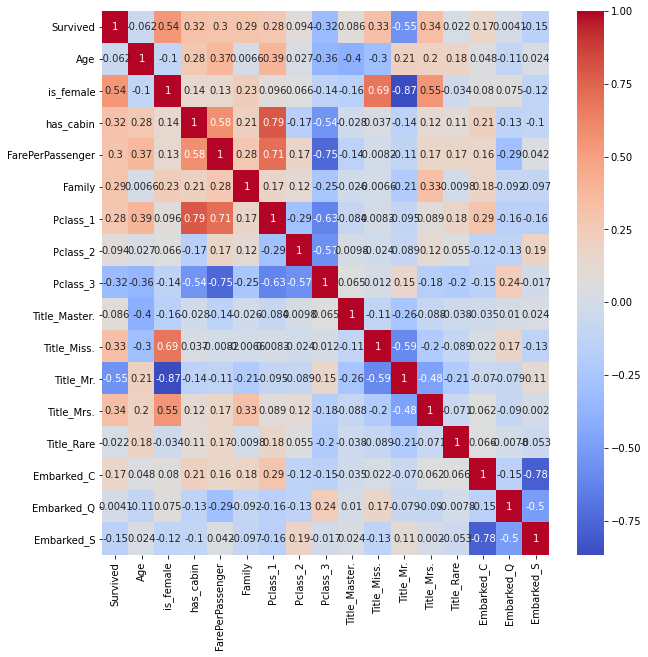

In [147]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(train.corr(),annot=True,cmap='coolwarm', ax=ax)

Escalamos os dados com MinMaxScaler pois o KNN é sensivel a amplitude dos dados, visto que o KNN calcula a distância entre os dados.

In [148]:
scaler = MinMaxScaler()

scaled_train = pd.DataFrame(data=scaler.fit_transform(train), columns=train.columns)
scaled_test = pd.DataFrame(data=scaler.fit_transform(test), columns=test.columns)

Testamos o KNN para vários valores de K, e chegamos no melhor valor de K=24

In [149]:
y = scaled_train['Survived']
X = scaled_train.drop(['Survived'], axis=1)

clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':list(range(1,60))})
clf.fit(X, y) 
pred = pd.DataFrame(clf.cv_results_)

In [150]:
best_param = pred[pred['mean_test_score']==pred['mean_test_score'].max()]

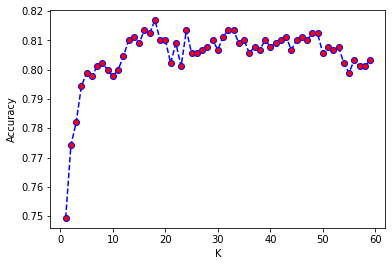

In [151]:
plt.plot(range(1,60), pred['mean_test_score'], color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()  

In [152]:
classifier = KNeighborsClassifier(best_param['param_n_neighbors'].mean().astype(int))
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [153]:
pred = pd.Series(classifier.predict(scaled_test), name='Survived').astype(int)
output = pd.DataFrame(data = [passenger_id.astype(int), pred]).transpose()
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [154]:
best_param['param_n_neighbors'].mean().astype(int)

18

In [155]:
output.to_csv('pred.csv', index=False)